In [146]:
import pandas as pd
import numpy as np
import warnings as ws
ws.filterwarnings("ignore")
from sklearn import (
model_selection,
metrics
)

In [147]:
df = pd.read_csv("USA_Housing.csv")

In [148]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\r\nLaurabury, NE 37..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\r\nLake Kathleen, ..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\r\nDanieltown, WI 064..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\r\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\r\nFPO AE 09386


In [149]:
def clean_name(name):
    return name.strip().lower().replace(" " , "_").replace(".", "").replace("avg_area_", "").strip()

In [150]:
df.rename(columns=clean_name, inplace = True)

In [151]:
df.head()

,income,house_age,number_of_rooms,number_of_bedrooms,area_population,price,address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\r\nLaurabury, NE 37..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\r\nLake Kathleen, ..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\r\nDanieltown, WI 064..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\r\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\r\nFPO AE 09386


In [152]:
df.drop(columns="address", inplace=True)

In [153]:
df.head()

,income,house_age,number_of_rooms,number_of_bedrooms,area_population,price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


In [154]:
X = df.drop(columns="price")
y = df["price"]

In [155]:
X_train, y_train, X_test, y_test = model_selection.train_test_split(X, y, random_state = 42, test_size = 0.2)

In [156]:
X_train.head()

,income,house_age,number_of_rooms,number_of_bedrooms,area_population
4227,66547.016454,5.846095,6.847298,4.13,27850.822901
4676,53722.008599,6.401391,7.787764,3.30,47649.224665
800,64838.492899,6.437157,8.699544,4.02,32921.010068
3671,67097.092120,6.086754,7.211963,3.05,27191.506877
4193,75245.465436,8.167820,7.420100,3.42,37410.669928


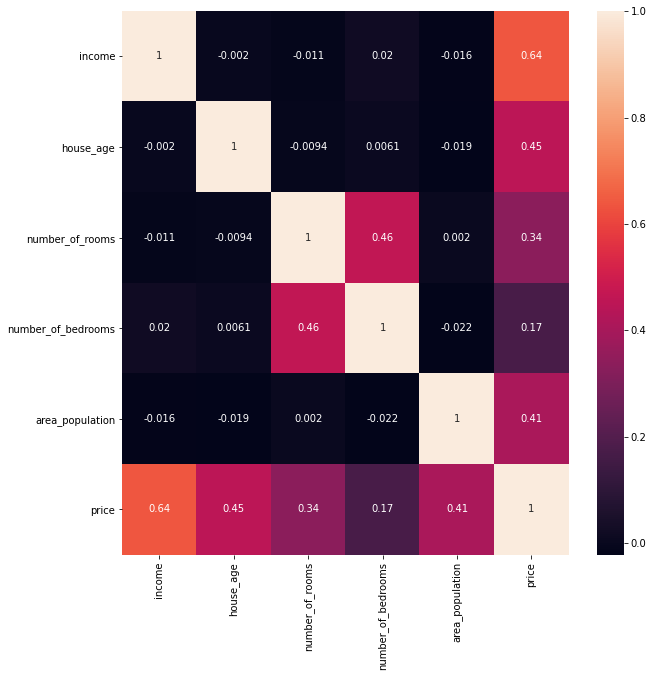

In [157]:
plt.figure(figsize = (10, 10))
sns.heatmap(df.corr(), annot = True)
plt.show()

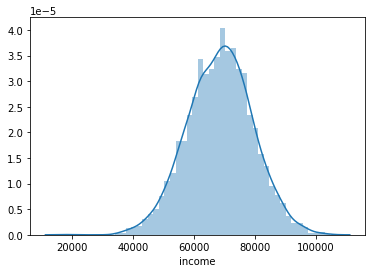

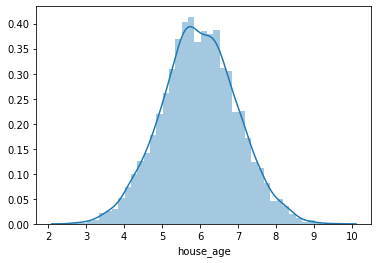

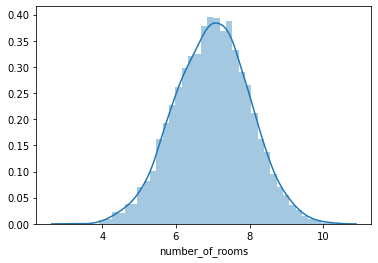

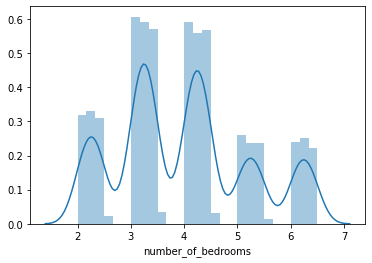

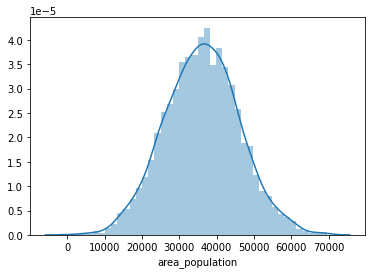

In [158]:
import seaborn as sns
import matplotlib.pyplot as plt

for i in X_train.columns.to_list():
    sns.distplot(X_train[i])
    plt.show()

In [159]:
df.number_of_bedrooms = df.number_of_bedrooms.astype(int)

In [160]:
df.number_of_rooms = df.number_of_rooms.astype(int)

In [161]:
df.head()

,income,house_age,number_of_rooms,number_of_bedrooms,area_population,price
0,79545.458574,5.682861,7,4,23086.800503,1.059034e+06
1,79248.642455,6.002900,6,3,40173.072174,1.505891e+06
2,61287.067179,5.865890,8,5,36882.159400,1.058988e+06
3,63345.240046,7.188236,5,3,34310.242831,1.260617e+06
4,59982.197226,5.040555,7,4,26354.109472,6.309435e+05


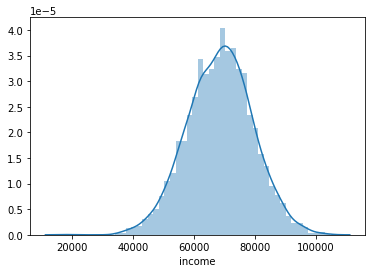

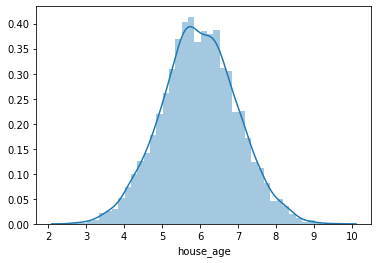

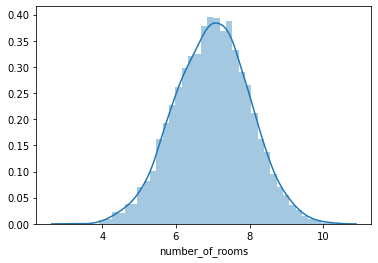

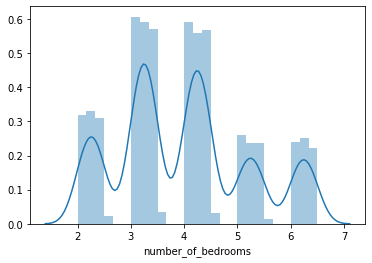

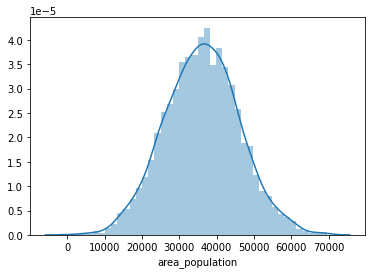

In [162]:
import seaborn as sns
import matplotlib.pyplot as plt

for i in X_train.columns.to_list():
    sns.distplot(X_train[i])
    plt.show()

In [163]:
df.number_of_bedrooms.value_counts()

3    1508
4    1450
2     828
6     612
5     602
Name: number_of_bedrooms, dtype: int64

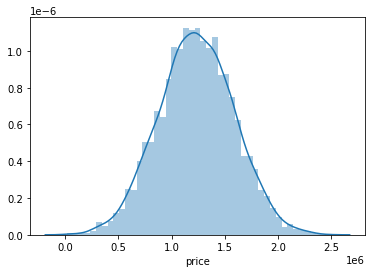

In [164]:
sns.distplot(y)

In [165]:
# As all the variables are normally ditributed start modelling

In [166]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import ElasticNet

In [167]:
X_train, X_test,  y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [168]:
X_train.shape

(4000, 5)

In [169]:
X_test.shape

(1000, 5)

In [170]:
# Trying the Linear Regression
linear = LinearRegression() 
linear.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [171]:
# Checking accuracy using cross_val
kf = KFold(n_splits=5, random_state=42)
score = cross_val_score(linear, X_train, y_train, cv = kf)

In [172]:
print("Mean Cross Val score ",round(score.mean()*100, 2 ),"%")

Mean Cross Val score  91.74 %


In [173]:
y_pred = linear.predict(X_test)

In [174]:
# Evaluating the linear regression
from sklearn.metrics import  r2_score, mean_squared_error

In [175]:
print("R2 score is ", r2_score(y_test, y_pred))

R2 score is  0.9179971706834578


In [176]:
print("Mean Squared Error is ", round(np.sqrt(mean_squared_error(y_test, y_pred)), 2))

Mean Squared Error is  100444.06


In [177]:
print(linear.coef_)

[2.16522058e+01 1.64666481e+05 1.19624012e+05 2.44037761e+03
 1.52703134e+01]


In [178]:
# As the MSE is high we will try more complex model

In [179]:
rfe = RandomForestRegressor(n_estimators=100, random_state=42)

In [180]:
rfe.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [181]:
score = cross_val_score(rfe, X_train, y_train, cv = kf)

In [182]:
score

array([0.88446246, 0.87506109, 0.87938534, 0.87865853, 0.89028369])

In [183]:
rfe_y_pred = rfe.predict(X_test)

In [184]:
print("R2 score is ", r2_score(y_test, rfe_y_pred))

R2 score is  0.8825746296876847


In [185]:
print("Mean Squared Error is ", round(np.sqrt(mean_squared_error(y_test, y_pred)), 2))

Mean Squared Error is  100444.06


In [186]:
# Now Vusializeing

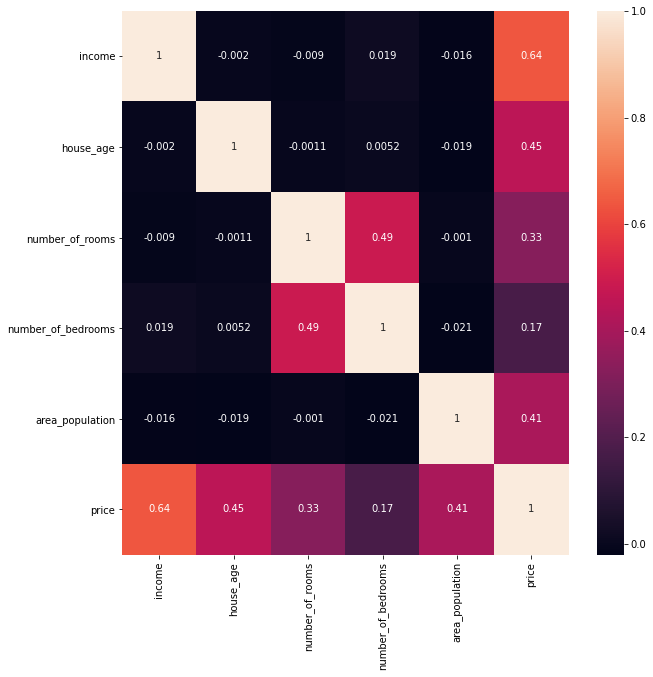

In [187]:
plt.figure(figsize = (10, 10))
sns.heatmap(df.corr(), annot = True)
plt.show()

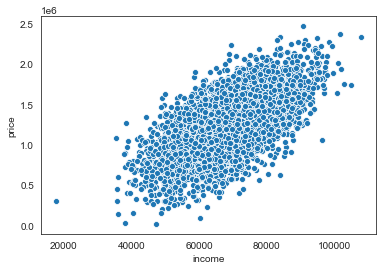

In [189]:
sns.set_style("white")
sns.scatterplot(x = "income", y ="price", data = df)
plt.show()

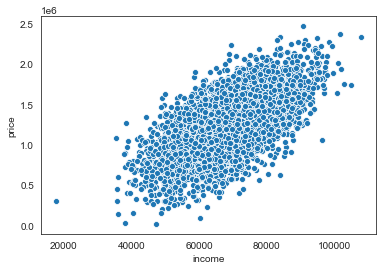

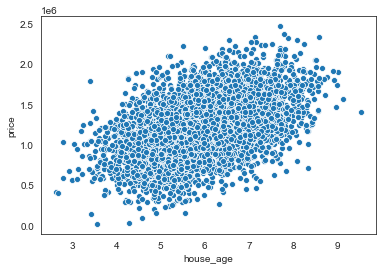

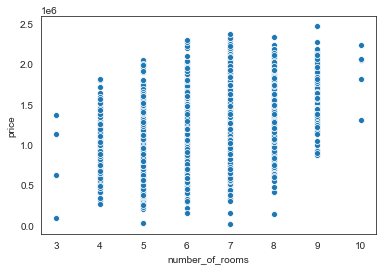

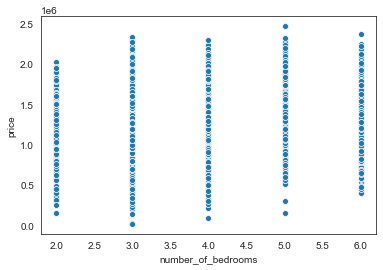

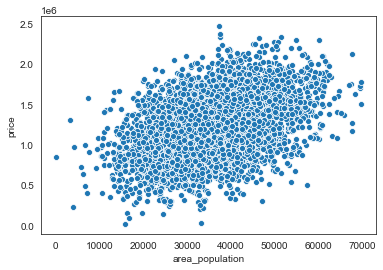

In [190]:
for i in X_train.columns.to_list():
    sns.set_style("white")
    sns.scatterplot(x = i, y ="price", data = df)
    plt.show()

In [196]:
# All the columns are quite well in relation
# Now we will scale the variables and then fit the model
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scale_X_train = scaler.fit_transform(X_train)
scale_X_test = scaler.transform(X_test)
linear1 = LinearRegression()
linear1.fit(scale_X_train, y_train)
y_pred1 = linear1.predict(scale_X_test)

In [197]:
score = cross_val_score(linear1, scale_X_train, y_train, cv = kf)

In [198]:
print(score)

[0.9133983  0.90998609 0.91931737 0.92055795 0.92380625]


In [200]:

print(r2_score(y_test, y_pred1))

0.9179971706834331


In [202]:
print(np.sqrt(mean_squared_error(y_test, y_pred1)))

100444.06055558482
